# VSB Power Grid Fault Detection

In [ ]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import pyarrow.parquet as pq 
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
INIT_DIR = '../input'
SIZE = 2001

In [ ]:
train = pq.read_pandas(os.path.join(INIT_DIR, 'vsb-power-line-fault-detection/train.parquet'), columns=[str(i) for i in range(SIZE)]).to_pandas()
metadata = pd.read_csv('../input/vsb-power-line-fault-detection/metadata_train.csv')

In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,18,1,-19,-16,-5,19,-15,15,-1,-16,...,-9,12,-18,6,-12,17,-7,-16,16,-4
1,18,0,-19,-17,-6,19,-17,16,0,-15,...,-9,11,-19,7,-12,17,-8,-16,16,-4
2,17,-1,-20,-17,-6,19,-17,15,-3,-15,...,-9,11,-20,4,-13,17,-8,-17,16,-5
3,18,1,-19,-16,-5,20,-16,16,0,-15,...,-9,12,-19,8,-12,17,-8,-18,14,-6
4,18,0,-19,-16,-5,20,-17,16,-2,-14,...,-9,12,-19,6,-12,17,-8,-16,15,-4


In [ ]:
train.shape

(800000, 2001)

In [ ]:
metadata.head()

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1


In [ ]:
metadata.shape

(8712, 4)

In [ ]:
train_metadata = metadata[:SIZE]

In [ ]:
train_metadata.shape

(2001, 4)

In [ ]:
train = train.T

In [ ]:
train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,799990,799991,799992,799993,799994,799995,799996,799997,799998,799999
0,18,18,17,18,18,18,19,18,18,17,...,18,18,17,17,18,19,19,17,19,17
1,1,0,-1,1,0,0,1,0,0,0,...,1,0,0,0,0,2,1,0,1,0


In [ ]:
train['signal_id'] = list(train_metadata['signal_id'])

In [ ]:
train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,799991,799992,799993,799994,799995,799996,799997,799998,799999,signal_id
0,18,18,17,18,18,18,19,18,18,17,...,18,17,17,18,19,19,17,19,17,0
1,1,0,-1,1,0,0,1,0,0,0,...,0,0,0,0,2,1,0,1,0,1


# Checking for null values in the dataframe

In [ ]:
train.isnull().sum().sum()

0

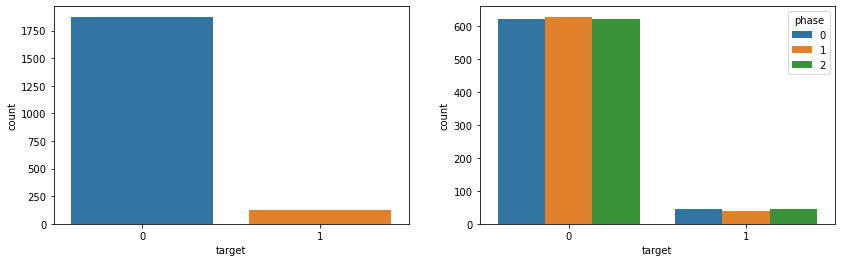

In [ ]:
# Plotting count vs target plots to check data imbalance

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.countplot(x="target", data=train, ax=ax1)
sns.countplot(x="target", data=train, hue="phase", ax=ax2);

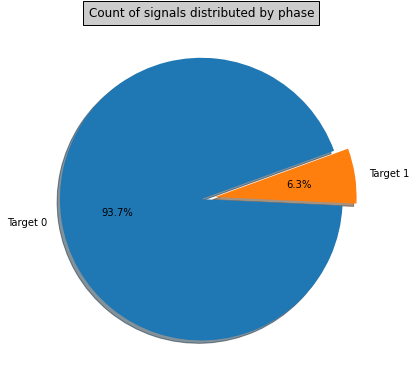

In [ ]:
# Percentage of positive and negative target values
plt.rcParams["figure.figsize"] = (40,6.5)
data = train['target'].value_counts()
labels = ['Target 0', 'Target 1']
colors = ["#1f77b4", "#ff7f0e"]
title = 'Count of signals distributed by phase'
explodes = [0, 0.1]
plt.pie(data,explode=explodes, labels=labels, colors=colors, shadow=True, startangle=20, autopct='%.1f%%')
plt.title(title, bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
target_count = train.target.value_counts()
print("negative(target=0) target: {}".format(target_count[0]))
print("positive(target=1) target: {}".format(target_count[1]))
print("positive data {:.3}%".format((target_count[1]/(target_count[0]+target_count[1]))*100))

negative(target=0) target: 1875
positive(target=1) target: 126
positive data 6.3%


In [ ]:
train[['id_measurement', 'phase']]

,id_measurement,phase
0,0,0
1,0,1
2,0,2
3,1,0
4,1,1
...,...,...
1996,665,1
1997,665,2
1998,666,0
1999,666,1


In [ ]:
target_mismatch = train[["id_measurement", "target"]].groupby(["id_measurement"]).sum().query("target != 3 & target != 0")
print("Target values not all postive or negative for same signal: {}".format(target_mismatch.shape[0]))
target_mismatch

Target values not all postive or negative for same signal: 11


,target
id_measurement,
67,2
96,1
126,1
159,1
271,1
301,1
443,1
518,1
601,2


In [ ]:
train[train['id_measurement'] == 67]

,0,1,2,3,4,5,6,7,8,9,...,799994,799995,799996,799997,799998,799999,signal_id,id_measurement,phase,target
201,-22,-23,-24,-21,-25,-21,-22,-22,-20,-23,...,-22,-21,-23,-21,-23,-22,201,67,0,1
202,14,13,11,15,11,15,13,13,15,11,...,13,15,12,15,13,14,202,67,1,1
203,8,6,5,8,5,9,6,8,9,6,...,7,8,5,9,6,7,203,67,2,0


In [ ]:
print("id_measurement have {} unique values".format(train.id_measurement.nunique()))

id_measurement have 667 unique values


### Basic description of the id_measurement column 

In [ ]:
train.id_measurement.value_counts().describe()

count    667.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: id_measurement, dtype: float64

In [ ]:
print("phase have {} unique values {} in train".format(len(train.phase.unique()),train.phase.unique()))

phase have 3 unique values [0 1 2] in train


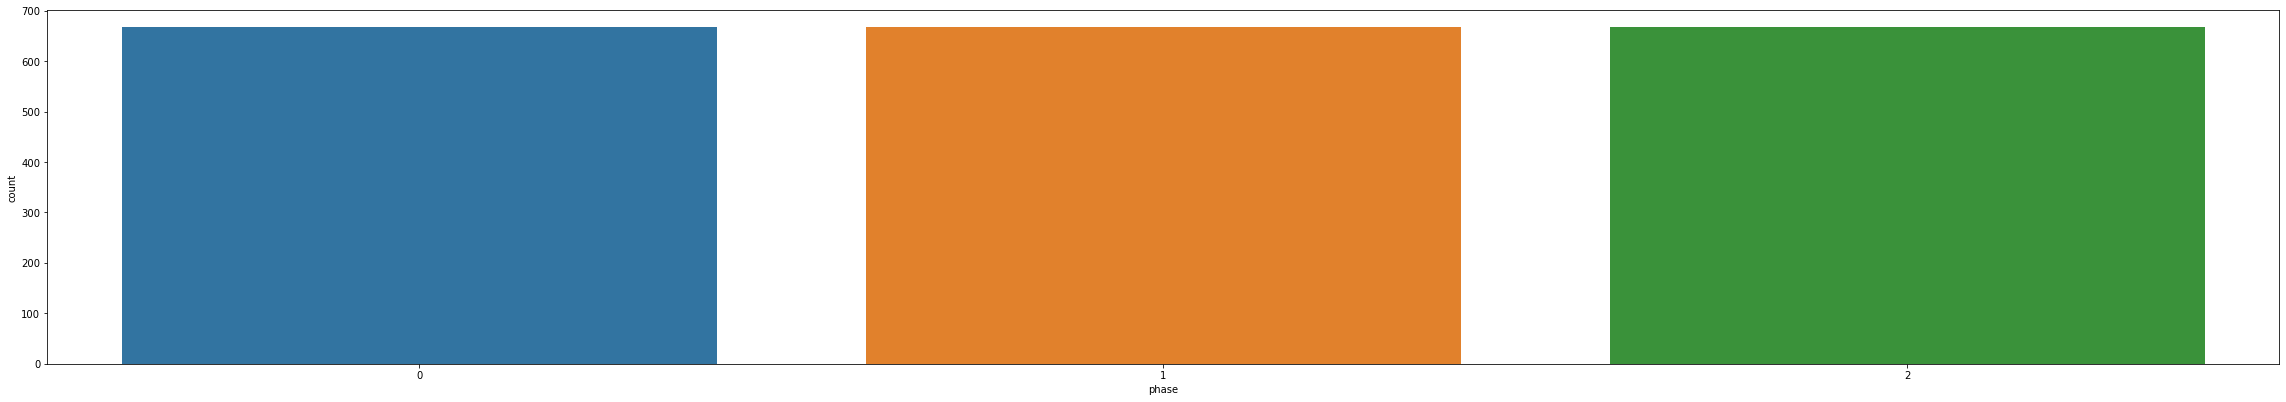

In [ ]:
sns.countplot(train['phase']);

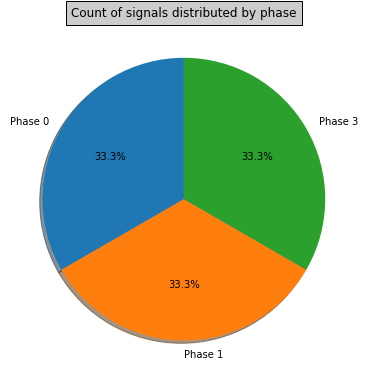

In [ ]:
data = train['phase'].value_counts()
labels = ['Phase 0', 'Phase 1', 'Phase 3']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
title = 'Count of signals distributed by phase'
plt.pie(data, labels=labels, colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
plt.title(title, bbox={'facecolor':'0.8', 'pad':5})
plt.show()